<a href="https://colab.research.google.com/github/Sahar-dev/C/blob/main/Estimation_of_density.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tp3 : Estimation de la densité de probabilité par histogramme et par noyaux

---


*   Tracage de l'histogramme des données
* Extraction des caractéristique des population
* estimation de la densité de probabilité par histogramme
*Estimation de la densite de probabilité

##Overview et division (extraction) du *données*

###overview

In [ ]:
import seaborn as sns

In [ ]:
Data=sns.load_dataset('iris')
Data.shape

(150, 5)

In [ ]:
Data.size

750

on a 4 features et 4 classes pour 150 données

In [ ]:
print(Data.head(52))

    sepal_length  sepal_width  petal_length  petal_width     species
0            5.1          3.5           1.4          0.2      setosa
1            4.9          3.0           1.4          0.2      setosa
2            4.7          3.2           1.3          0.2      setosa
3            4.6          3.1           1.5          0.2      setosa
4            5.0          3.6           1.4          0.2      setosa
5            5.4          3.9           1.7          0.4      setosa
6            4.6          3.4           1.4          0.3      setosa
7            5.0          3.4           1.5          0.2      setosa
8            4.4          2.9           1.4          0.2      setosa
9            4.9          3.1           1.5          0.1      setosa
10           5.4          3.7           1.5          0.2      setosa
11           4.8          3.4           1.6          0.2      setosa
12           4.8          3.0           1.4          0.1      setosa
13           4.3          3.0     

###Extraction du 4 features

In [ ]:
sepLen=Data["sepal_length"]
sepLen.head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

In [ ]:
sepWid=Data["sepal_width"]
sepWid.head()

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64

In [ ]:
petLen=Data["petal_length"]
petLen.head()

0    1.4
1    1.4
2    1.3
3    1.5
4    1.4
Name: petal_length, dtype: float64

In [ ]:
petWid=Data["petal_width"]
petWid.head()

0    0.2
1    0.2
2    0.2
3    0.2
4    0.2
Name: petal_width, dtype: float64

###Extraction du 4 classes  

In [ ]:
N=50
c1 =sepLen[0:N]
SepLenc1=sepLen[:N]
SepLenc2=sepLen[50:50+N]
SepLenc3=sepLen[50+N:50+2*N]

In [ ]:

sepWid1=sepWid[:N]
sepWid2=sepWid[50:50+N]
sepWid3=sepWid[50+N:50+2*N]

In [ ]:

petLen1=petLen[:N]
petLen2=petLen[50:50+N]
petLen3=petLen[50+N:50+2*N]

In [ ]:

petWid1=petWid[:N]
petWid2=petWid[50:50+N]
petWid3=petWid[50+N:50+2*N]

In [ ]:
c1.sepal_length.describe()

count    50.00000
mean      5.00600
std       0.35249
min       4.30000
25%       4.80000
50%       5.00000
75%       5.20000
max       5.80000
Name: sepal_length, dtype: float64

In [ ]:
c2.sepal_length.describe()

count    50.000000
mean      5.936000
std       0.516171
min       4.900000
25%       5.600000
50%       5.900000
75%       6.300000
max       7.000000
Name: sepal_length, dtype: float64

In [ ]:
c3.sepal_length.describe()

count    50.00000
mean      6.58800
std       0.63588
min       4.90000
25%       6.22500
50%       6.50000
75%       6.90000
max       7.90000
Name: sepal_length, dtype: float64

##Etude pour *sepal_length*

In [ ]:
import pandas as pd
print (c1.skew(axis=1))

0     1.893284e-01
1     4.043887e-01
2     2.087824e-01
3     1.201299e-01
4     9.075320e-02
5     9.079307e-02
6     4.990066e-02
7     1.552802e-01
8     1.905910e-01
9     2.312940e-01
10    1.805800e-01
11    1.155237e-15
12    2.909502e-01
13    1.573727e-01
14    2.782715e-01
15    6.552784e-02
16    2.227617e-01
17    2.363613e-01
18    2.324684e-01
19    4.323948e-02
20    2.692644e-01
21    1.357173e-01
22    6.928019e-02
23    3.509411e-01
24   -1.834960e-01
25    3.677944e-01
26    2.174442e-01
27    1.968134e-01
28    2.937038e-01
29    5.964362e-02
30    1.834960e-01
31    4.525706e-01
32   -1.128782e-01
33    3.453945e-02
34    2.909502e-01
35    3.910657e-01
36    3.994677e-01
37    0.000000e+00
38    1.742089e-01
39    2.056541e-01
40    2.251929e-01
41    8.612781e-01
42    5.260571e-02
43    2.606997e-01
44   -1.041100e-01
45    4.110031e-01
46   -4.544199e-02
47    1.101091e-01
48    1.358866e-01
49    2.576413e-01
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
print (c2.skew(axis=1))

50    2.729342e-01
51    1.257432e-01
52    2.057964e-01
53    2.886630e-01
54    3.166219e-01
55   -1.724529e-01
56   -6.269063e-02
57    1.647225e-01
58    2.139564e-01
59    0.000000e+00
60    3.206997e-01
61    1.386161e-01
62    4.190622e-01
63   -5.431214e-02
64    3.179179e-01
65    3.549027e-01
66   -2.555497e-01
67    0.000000e+00
68    4.193117e-01
69    1.920262e-01
70   -1.836102e-01
71    3.888502e-01
72    1.636345e-01
73   -1.031621e-01
74    2.966938e-01
75    3.507662e-01
76    2.881246e-01
77    1.968134e-01
78    5.964362e-02
79    4.230932e-01
80    2.583185e-01
81    2.639848e-01
82    2.683300e-01
83   -7.928442e-02
84   -3.856340e-01
85   -2.137419e-01
86    2.225064e-01
87    4.182284e-01
88   -1.450041e-01
89    1.905910e-01
90   -1.654325e-01
91   -5.861538e-02
92    2.525202e-01
93    3.123103e-01
94   -1.105615e-15
95   -2.046150e-01
96   -6.720020e-02
97    1.831728e-01
98    6.046680e-01
99    6.720020e-02
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
print (c3.skew(axis=1))

100   -1.285632e-01
101   -3.614479e-02
102    9.450243e-02
103   -1.312189e-01
104   -2.895453e-02
105    2.236197e-02
106   -1.692376e-01
107   -2.539674e-02
108    4.672178e-02
109    1.153629e-15
110    1.047849e-01
111    1.056644e-01
112    1.536547e-01
113    6.130967e-02
114    9.952184e-02
115    9.308652e-02
116   -7.707131e-02
117   -1.989079e-01
118    5.936087e-02
119    9.166204e-02
120    1.142441e-01
121   -4.337563e-02
122    3.852033e-02
123    2.235893e-01
124   -8.093218e-02
125   -6.955518e-02
126    1.989215e-01
127   -1.005145e-15
128    2.895453e-02
129   -7.091477e-16
130    1.075153e-01
131   -1.151718e-01
132    5.592586e-02
133   -4.323948e-02
134   -1.919376e-01
135    2.636590e-01
136   -1.268922e-01
137   -1.613251e-01
138   -1.276933e-15
139    2.148312e-01
140    1.454808e-01
141    4.850642e-01
142   -3.614479e-02
143    0.000000e+00
144    7.702523e-02
145    3.515141e-01
146    2.564784e-01
147    1.347946e-01
148   -1.462441e-01
149   -1.853869e-01


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


##Estimation par histogramme

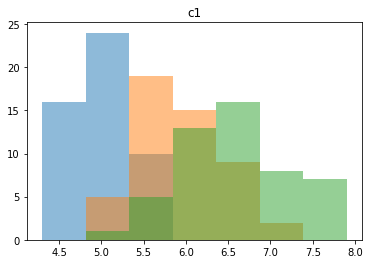

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats
k=int(np.floor(np.sqrt(N)))
bin1 =np.linspace(sepLen.min(),sepLen.max(), k+1)
plt.hist(SepLenc1,bins=bin1, alpha=0.5)
plt.hist(SepLenc2,bins=bin1,alpha=0.5)
plt.hist(SepLenc3,bins=bin1,alpha=0.5)
plt.xlabel("")
plt.ylabel("")
plt.title("c1")

plt.show()


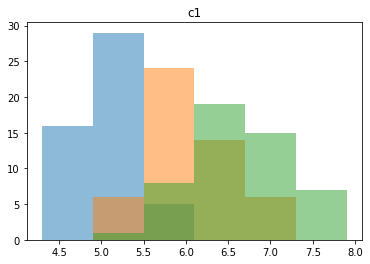

In [ ]:
k2 =int(np.floor(2.5*N**(1/4)))
bin2 =np.linspace(sepLen.min(),sepLen.max(), k2+1)
plt.hist(SepLenc1,bins=bin2, alpha=0.5)
plt.hist(SepLenc2,bins=bin2,alpha=0.5)
plt.hist(SepLenc3,bins=bin2,alpha=0.5)
plt.xlabel("")
plt.ylabel("")
plt.title("c1")
plt.show()

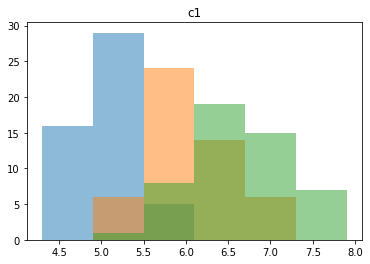

In [ ]:
k3 =int(1+3.3*np.log10(N))
bin3 =np.linspace(sepLen.min(),sepLen.max(), k3+1)
plt.hist(SepLenc1,bins=bin3, alpha=0.5)
plt.hist(SepLenc2,bins=bin3,alpha=0.5)
plt.hist(SepLenc3,bins=bin3,alpha=0.5)
plt.xlabel("")
plt.ylabel("")
plt.title("c1")
plt.show()

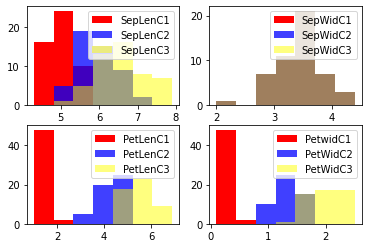

In [ ]:
plt.subplot(221)
plt.hist(SepLenc1,np.linspace(sepLen.min(),sepLen.max(),int(k+1)),color="red",alpha=1,label="SepLenC1")
plt.hist(SepLenc2,np.linspace(sepLen.min(),sepLen.max(),int(k+1)),color="blue",alpha=0.75,label="SepLenC2")
plt.hist(SepLenc3,np.linspace(sepLen.min(),sepLen.max(),int(k+1)),color="yellow",alpha=0.5,label="SepLenC3")
plt.legend()
plt.subplot(222)
plt.hist(sepWid1,np.linspace(sepWid.min(),sepWid.max(),int(k+1)),color="red",alpha=1,label="SepWidC1")
plt.hist(sepWid1,np.linspace(sepWid.min(),sepWid.max(),int(k+1)),color="blue",alpha=0.75,label="SepWidC2")
plt.hist(sepWid1,np.linspace(sepWid.min(),sepWid.max(),int(k+1)),color="yellow",alpha=0.5,label="SepWidC3")
plt.legend()
plt.subplot(223)
plt.hist(petLen1,np.linspace(petLen.min(),petLen.max(),int(k+1)),color="red",alpha=1,label="PetLenC1")
plt.hist(petLen2,np.linspace(petLen.min(),petLen.max(),int(k+1)),color="blue",alpha=0.75,label="PetLenC2")
plt.hist(petLen3,np.linspace(petLen.min(),petLen.max(),int(k+1)),color="yellow",alpha=0.5,label="PetLenC3")
plt.legend()
plt.subplot(224)
plt.hist(petWid1,np.linspace(petWid.min(),petWid.max(),int(k+1)),color="red",alpha=1,label="PetwidC1")
plt.hist(petWid2,np.linspace(petWid.min(),petWid.max(),int(k+1)),color="blue",alpha=0.75,label="PetWidC2")
plt.hist(petWid3,np.linspace(petWid.min(),petWid.max(),int(k+1)),color="yellow",alpha=0.5,label="PetWidC3")
plt.legend()
plt.show()

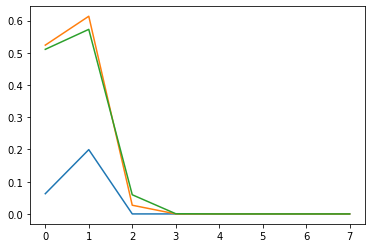

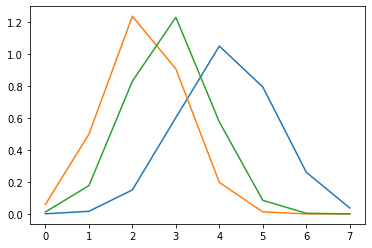

In [ ]:
from scipy.stats import norm
PetLenDensity = norm.pdf(np.linspace(petLen.min(),petLen.max(),int(k+1)),loc=np.mean(petLen),scale=np.std(petLen))
SepWidDensity = norm.pdf(np.linspace(sepWid.min(),sepWid.max(),int(k+1)),loc=np.mean(petLen),scale=np.std(petLen))
plt.plot(norm.pdf(np.linspace(petLen.min(),petLen.max(),int(k+1)),loc=np.mean(petLen1),scale=np.std(petLen1)))
plt.plot(norm.pdf(np.linspace(petLen.min(),petLen.max(),int(k+1)),loc=np.mean(petLen1),scale=np.std(petLen2)))
plt.plot(norm.pdf(np.linspace(petLen.min(),petLen.max(),int(k+1)),loc=np.mean(petLen1),scale=np.std(petLen3)))
plt.show()
plt.plot(norm.pdf(np.linspace(sepWid.min(),sepWid.max(),int(k+1)),loc=np.mean(sepWid1),scale=np.std(sepWid1)))
plt.plot(norm.pdf(np.linspace(sepWid.min(),sepWid.max(),int(k+1)),loc=np.mean(sepWid2),scale=np.std(sepWid2)))
plt.plot(norm.pdf(np.linspace(sepWid.min(),sepWid.max(),int(k+1)),loc=np.mean(sepWid3),scale=np.std(sepWid3)))
plt.show()

## Estimation par noyaux

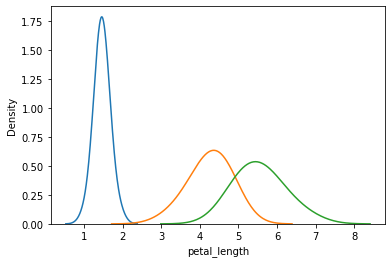

In [ ]:
sns.kdeplot(petLen1,bw_adjust=2)
sns.kdeplot(petLen2,bw_adjust=2)
sns.kdeplot(petLen3,bw_adjust=2)

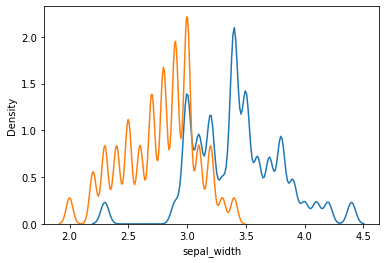

In [ ]:
sns.kdeplot(sepWid1,bw_adjust=0.2)
sns.kdeplot(sepWid2,bw_adjust=0.2)

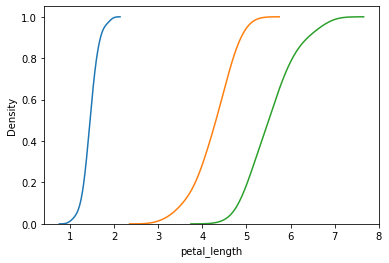

In [ ]:
PetLenDensityNoyauc1=sns.kdeplot(petLen1,cumulative=True)
PetLenDensityNoyauc1=sns.kdeplot(petLen2,cumulative=True)
PetLenDensityNoyauc1=sns.kdeplot(petLen3,cumulative=True)